In [7]:
pip install easyocr


In [8]:
import easyocr
import cv2

# Load the model with GPU support
reader_gpu = easyocr.Reader(['en'], gpu=True)

# Optionally, load a CPU version for comparison
reader_cpu = easyocr.Reader(['en'], gpu=False)


/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [23]:
# Load the image
image_path = '/content/example_image.webp'
image = cv2.imread(image_path)
 # Adjust language as needed
results_gpu = reader_gpu.readtext(image)

# First, sort by Y-axis (top to bottom)
results = sorted(results_gpu, key=lambda r: r[0][0][1])

# Then sort by X-axis (left to right) within each line
sorted_results = sorted(results, key=lambda r: (r[0][0][1], r[0][0][0]))

# Join the sorted text results into a single string
ordered_text = ' '.join([result[1] for result in sorted_results])

print(ordered_text)


Noisy image to test Tesseract OCR


In [24]:
print(ordered_text.upper())

NOISY IMAGE TO TEST TESSERACT OCR


In [25]:
import time
# Function to calculate FPS
def calculate_fps(model, image, iterations=10):
    start_time = time.time()
    for _ in range(iterations):
        model.readtext(image)
    end_time = time.time()
    total_time = end_time - start_time
    fps = iterations / total_time
    return fps

# Calculate FPS for both GPU and CPU models
fps_gpu = calculate_fps(reader_gpu, image)
fps_cpu = calculate_fps(reader_cpu, image)

print(f"FPS on GPU: {fps_gpu:.2f}")
print(f"FPS on CPU: {fps_cpu:.2f}")


FPS on GPU: 0.48
FPS on CPU: 0.41


In [26]:
import tensorflow as tf

In [27]:
import torch

# Ensure the model runs on CPU
device = torch.device('cpu')

# Initialize the EasyOCR reader with the desired languages
reader = easyocr.Reader(['en'], gpu=False)  # Set gpu=False to ensure the model runs on CPU

# Load your image path
image_path = '/content/example_image.webp'  # Replace with your image path

# Perform OCR on the image
results_cpu = reader.readtext(image_path)

results = sorted(results_cpu, key=lambda r: r[0][0][1])

# Then sort by X-axis (left to right) within each line
sorted_results = sorted(results_cpu, key=lambda r: (r[0][0][0], r[0][0][1]))

# Join the sorted text results into a single string
ordered_text_new = ' '.join([result[1] for result in sorted_results])

print(ordered_text_new)



Tesseract OCR Noisy image to test


In [28]:
print(ordered_text_new.upper())

TESSERACT OCR NOISY IMAGE TO TEST


In [29]:
import time

# Perform OCR using the CPU-based model and measure time
start_time = time.time()
results_cpu = reader_cpu.readtext(image)
cpu_time = time.time() - start_time

# Perform OCR using the GPU-based model and measure time
start_time = time.time()
results_gpu = reader_gpu.readtext(image)
gpu_time = time.time() - start_time

# Print the time taken by each model
print(f"Time taken by CPU model(Speed): {cpu_time:.4f} seconds")
print(f"Time taken by GPU model(Speed): {gpu_time:.4f} seconds")



Time taken by CPU model(Speed): 2.1300 seconds
Time taken by GPU model(Speed): 1.7791 seconds


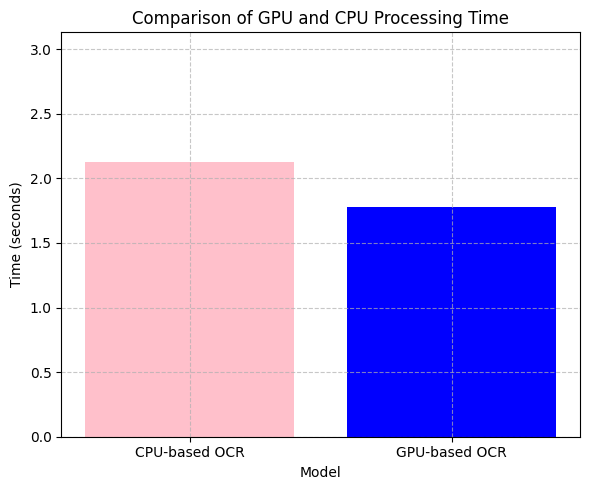

In [30]:
import matplotlib.pyplot as plt

models = ['CPU-based OCR', 'GPU-based OCR']
times = [cpu_time, gpu_time]

plt.figure(figsize=(6, 5))
plt.bar(models, times, color=['pink', 'blue'])
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Comparison of GPU and CPU Processing Time')
plt.ylim(0, max(times) + 1)  # Set y-axis limit slightly above the maximum time for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Ground truth for the image
ground_truth = "NOISY IMAGE TO TEST TESSERACT OCR"  # Replace with the actual text in your image

# Perform OCR on the image
results_cpu = reader.readtext(image_path)

results = sorted(results_cpu, key=lambda r: r[0][0][1])

# Then sort by X-axis (left to right) within each line
sorted_results = sorted(results_cpu, key=lambda r: (r[0][0][1], r[0][0][0]))

# Join the sorted text results into a single string
ordered_text_new = ' '.join([result[1] for result in sorted_results])

extracted_text=ordered_text_new.upper()
print(extracted_text)
# Simple accuracy check
accuracy = sum(1 for a, b in zip(extracted_text, ground_truth) if a == b) / len(ground_truth)
print(f"Accuracy: {accuracy * 100:.2f}%")

NOISY IMAGE TO TEST TESSERACT OCR
Accuracy: 100.00%


In [38]:
# Initialize the EasyOCR reader with or without GPU
device = 'gpu' if torch.cuda.is_available() else 'cpu'
reader = easyocr.Reader(['en'], gpu=(device == 'gpu'))

# Load your image path
image_path = '/content/example_image.webp'  # Replace with your image path

# Number of repetitions for FPS calculation
num_reps = 10

# Measure FPS
start_time = time.time()

for _ in range(num_reps):
    reader.readtext(image_path)

end_time = time.time()

# Calculate FPS
fps = num_reps / (end_time - start_time)
print(f"FPS on {device.upper()}: {fps:.2f}")

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

FPS on CPU: 0.45
